In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

national_df = pd.read_csv("/content/indian-national-level-election.csv")
state_df = pd.read_csv("/content/indian-state-level-election.csv")
ge2024_df = pd.read_csv("/content/GE_2024_Results new.csv")

print("Files Loaded")
print("National Election Data Shape:", national_df.shape)
print("State Election Data Shape:", state_df.shape)
print("GE2024 Data Shape:", ge2024_df.shape)

Files Loaded
National Election Data Shape: (73081, 11)
State Election Data Shape: (327294, 11)
GE2024 Data Shape: (8902, 9)


In [4]:
# Convert 'Total Votes' and '% of Votes' to numeric (GE2024)
ge2024_df['Total Votes'] = pd.to_numeric(ge2024_df['Total Votes'], errors='coerce')
ge2024_df['% of Votes'] = pd.to_numeric(ge2024_df['% of Votes'], errors='coerce')

In [5]:
# Drop rows where 'Total Votes' or '% of Votes' is missing
ge2024_df.dropna(subset=['Total Votes', '% of Votes'], inplace=True)

In [6]:
# Clean column names in all datasets
ge2024_df.columns = ge2024_df.columns.str.strip().str.replace(" ", "_")
national_df.columns = national_df.columns.str.strip().str.replace(" ", "_")
state_df.columns = state_df.columns.str.strip().str.replace(" ", "_")

In [8]:
# Adding calculated field: Voter Turnout %
if 'electors' in national_df.columns:
    national_df['turnout_pct'] = (national_df['totvotpoll'] / national_df['electors']) * 100

if 'electors' in state_df.columns:
    state_df['turnout_pct'] = (state_df['totvotpoll'] / state_df['electors']) * 100


if 'cand_sex' in national_df.columns:
    national_df['cand_sex'] = national_df['cand_sex'].str.upper()

In [10]:
print("\n GE2024 Data Sample:")
display(ge2024_df.head())


 GE2024 Data Sample:


,State,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,%_of_Votes,Result
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Lost


In [11]:
print("\n National Election Data Sample:")
display(national_df.head())


 National Election Data Sample:


,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors,turnout_pct
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308,29.502509
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308,41.496694
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084,0.113442
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084,0.130095
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084,0.421506


In [12]:
print("\n State Election Data Sample:")
display(state_df.head())


 State Election Data Sample:


,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors,turnout_pct
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247,0.976612
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247,2.093769
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247,5.317909
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247,23.790647
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247,41.143825


In [14]:
# Converting vote percentage and turnout percentage to float (if not already)
ge2024_df['%_of_Votes'] = ge2024_df['%_of_Votes'].astype(float)

In [15]:
# Calculating vote margin between top two candidates per constituency
ge2024_sorted = ge2024_df.sort_values(by=['State', 'Constituency', 'Total_Votes'], ascending=[True, True, False])
ge2024_sorted['Rank'] = ge2024_sorted.groupby(['State', 'Constituency'])['Total_Votes'].rank(method='first', ascending=False)


In [16]:
# Extracting top two candidates per constituency
top_candidates = ge2024_sorted[ge2024_sorted['Rank'] <= 2].copy()
margin_df = top_candidates.pivot_table(index=['State', 'Constituency'], columns='Rank', values='Total_Votes').reset_index()
margin_df.columns = ['State', 'Constituency', 'Runner_Up_Votes', 'Winner_Votes']
margin_df['Vote_Margin'] = margin_df['Winner_Votes'] - margin_df['Runner_Up_Votes']


In [17]:
# Merging margin back to main GE 2024 DataFrame
ge2024_df = ge2024_df.merge(margin_df[['State', 'Constituency', 'Vote_Margin']], on=['State', 'Constituency'], how='left')


In [18]:
ge2024_df['Won_Flag'] = ge2024_df['Result'].apply(lambda x: 1 if x.strip().lower() == 'won' else 0)

print("GE2024 with Engineered Features")
display(ge2024_df.head())

GE2024 with Engineered Features


,State,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,%_of_Votes,Result,Vote_Margin,Won_Flag
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won,-24396.0,1
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost,-24396.0,0
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Lost,-24396.0,0
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Lost,-24396.0,0
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Lost,-24396.0,0


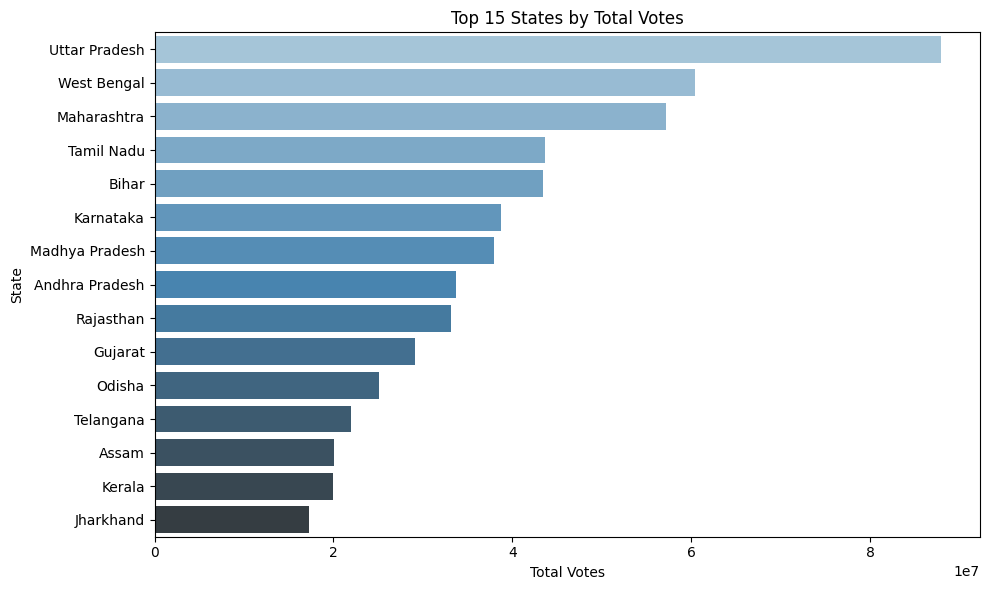

In [20]:
# Total votes by state (top 15)
state_votes = ge2024_df.groupby('State')['Total_Votes'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=state_votes.values, y=state_votes.index, palette="Blues_d")
plt.title("Top 15 States by Total Votes")
plt.xlabel("Total Votes")
plt.ylabel("State")
plt.tight_layout()
plt.show()

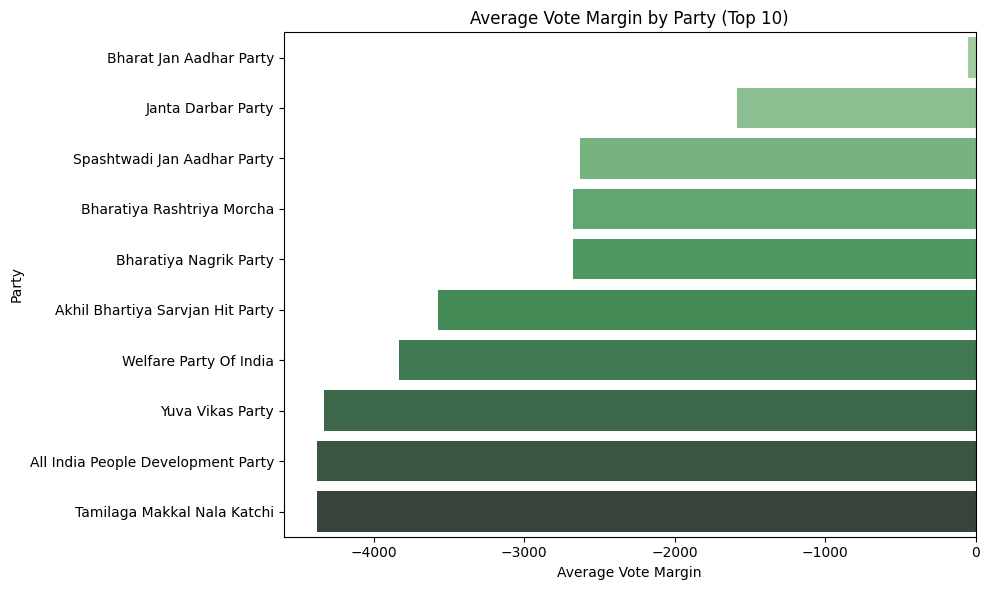

In [21]:
# Average vote margin by party (top 10)
party_margin = ge2024_df.groupby('Party')['Vote_Margin'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=party_margin.values, y=party_margin.index, palette="Greens_d")
plt.title("Average Vote Margin by Party (Top 10)")
plt.xlabel("Average Vote Margin")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

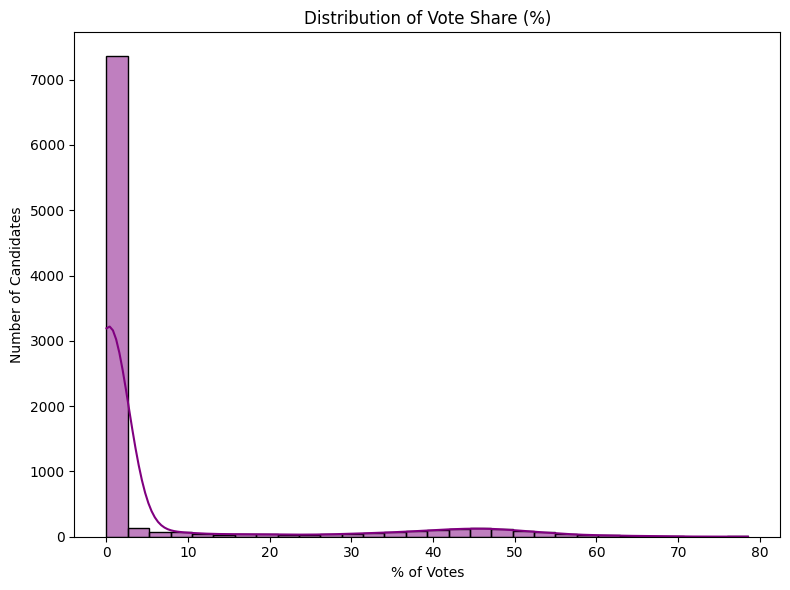

In [22]:
# Distribution of % vote share
plt.figure(figsize=(8,6))
sns.histplot(ge2024_df['%_of_Votes'], bins=30, kde=True, color='purple')
plt.title("Distribution of Vote Share (%)")
plt.xlabel("% of Votes")
plt.ylabel("Number of Candidates")
plt.tight_layout()
plt.show()

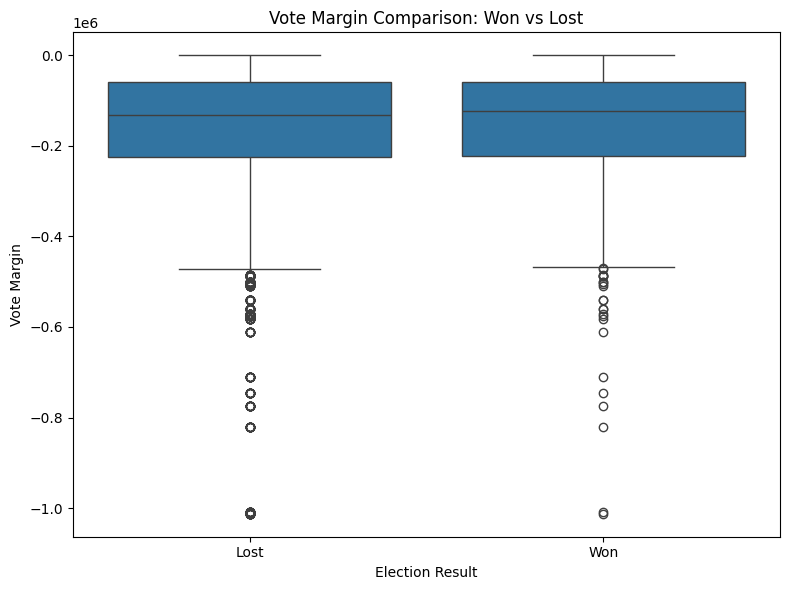

In [23]:
# Boxplot: Vote Margin vs Win/Loss
plt.figure(figsize=(8,6))
sns.boxplot(x='Won_Flag', y='Vote_Margin', data=ge2024_df)
plt.title("Vote Margin Comparison: Won vs Lost")
plt.xticks([0, 1], ['Lost', 'Won'])
plt.xlabel("Election Result")
plt.ylabel("Vote Margin")
plt.tight_layout()
plt.show()

In [24]:
# Encoding party as a feature for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ge2024_df['Party_Label'] = label_encoder.fit_transform(ge2024_df['Party'].astype(str))

# Features for modeling
features = ['Party_Label', 'Vote_Margin']
X_class = ge2024_df[features]
y_class = ge2024_df['Won_Flag']
y_reg = ge2024_df['%_of_Votes']


from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_class, y_reg, test_size=0.2, random_state=42)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_c, y_train_c)
y_pred_c = clf.predict(X_test_c)

print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Classification Report:")
print(classification_report(y_test_c, y_pred_c))

Accuracy: 0.9455362156092083
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1669
           1       0.59      0.43      0.50       112

    accuracy                           0.95      1781
   macro avg       0.78      0.70      0.73      1781
weighted avg       0.94      0.95      0.94      1781



In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)

print("R² Score:", r2_score(y_test_r, y_pred_r))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))  # Fix: manually apply sqrt


R² Score: 0.7455825779759107
RMSE: 7.303635146671344


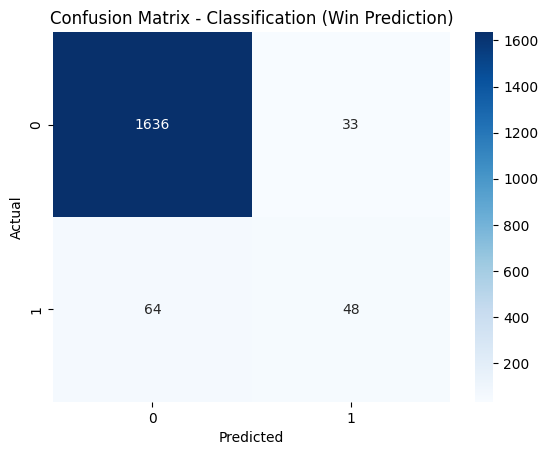

In [29]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Classification (Win Prediction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

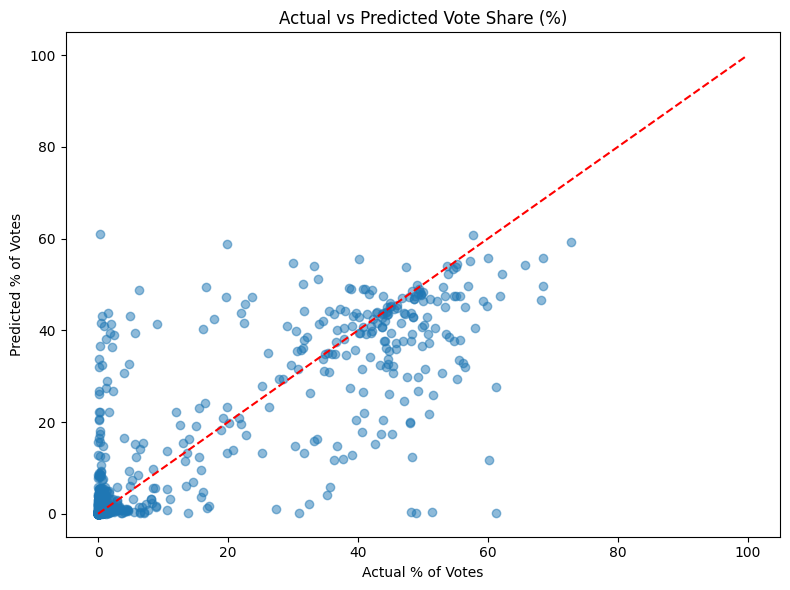

In [30]:
# Scatterplot for regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test_r, y_pred_r, alpha=0.5)
plt.title("Actual vs Predicted Vote Share (%)")
plt.xlabel("Actual % of Votes")
plt.ylabel("Predicted % of Votes")
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.tight_layout()
plt.show()

In [36]:
def predict_election_outcome(party_name: str, vote_margin: float):
    # Check if the party exists in the label encoder
    if party_name not in label_encoder.classes_:
        print(f"Party '{party_name}' not found in training data. Try one of these:")
        print(list(label_encoder.classes_))
        return


    party_label = label_encoder.transform([party_name])[0]


    input_data = pd.DataFrame([[party_label, vote_margin]], columns=['Party_Label', 'Vote_Margin'])


    win_prediction = clf.predict(input_data)[0]
    vote_share_prediction = reg.predict(input_data)[0]


    print(f"\nPrediction for candidate from '{party_name}' with vote margin of {vote_margin}:")
    print(f"➡ Predicted to {'WIN' if win_prediction == 1 else 'LOSE'}")
    print(f"➡ Expected Vote Share: {vote_share_prediction:.2f}%")

# Example usage
predict_election_outcome("Indian National Congress", 10000000)



Prediction for candidate from 'Indian National Congress' with vote margin of 10000000:
➡ Predicted to WIN
➡ Expected Vote Share: 30.66%


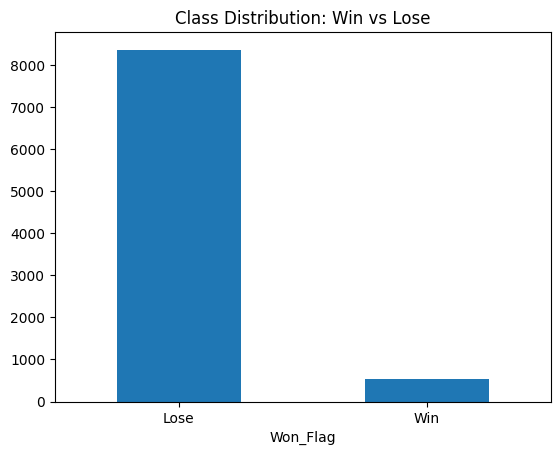

In [38]:
import matplotlib.pyplot as plt
ge2024_df['Won_Flag'].value_counts().plot(kind='bar')
plt.title("Class Distribution: Win vs Lose")
plt.xticks([0, 1], ['Lose', 'Win'], rotation=0)
plt.show()


In [39]:
from sklearn.utils import resample

winners = ge2024_df[ge2024_df['Won_Flag'] == 1]
losers = ge2024_df[ge2024_df['Won_Flag'] == 0]

losers_downsampled = resample(losers,
                              replace=False,
                              n_samples=len(winners),
                              random_state=42)


balanced_df = pd.concat([winners, losers_downsampled])


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
balanced_df['Party_Label'] = label_encoder.fit_transform(balanced_df['Party'].astype(str))


features = ['Party_Label', 'Vote_Margin']
X_bal = balanced_df[features]
y_class_bal = balanced_df['Won_Flag']
y_reg_bal = balanced_df['%_of_Votes']


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_bal, y_class_bal, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_bal, y_reg_bal, test_size=0.2, random_state=42)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_c, y_train_c)


reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_r, y_train_r)


RandomForestRegressor(random_state=42)

In [42]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_c = clf.predict(X_test_c)
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Classification Report:\n", classification_report(y_test_c, y_pred_c))

Accuracy: 0.8294930875576036
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       106
           1       0.85      0.81      0.83       111

    accuracy                           0.83       217
   macro avg       0.83      0.83      0.83       217
weighted avg       0.83      0.83      0.83       217



In [44]:
import joblib

joblib.dump(clf, "classifier_model.pkl")
joblib.dump(reg, "regression_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

from google.colab import files
files.download("classifier_model.pkl")
files.download("regression_model.pkl")
files.download("label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>